In [1]:
import pandas as pd 


In [2]:
#df=pd.read_csv("311_0614_0712.csv")

In [3]:
#df=pd.read_csv("311_0621_0712_i_only.csv", low_memory=False)

In [4]:
df=pd.read_csv("311_may_julyi.csv", low_memory=False)

In [5]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct
0,61752565,07/09/2024 11:58:55 PM,07/10/2024 02:34:33 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11370.0,22-15 79 STREET,...,NaN,40.768269,-73.890511,"(40.76826949428633, -73.89051137517352)",14781.0,39.0,3.0,4.0,72.0,72.0
1,61752730,07/09/2024 11:58:50 PM,07/13/2024 02:09:21 PM,DSNY,Department of Sanitation,Illegal Dumping,Removal Request,Street,11234.0,AVENUE T,...,NaN,40.615647,-73.917888,"(40.61564738951791, -73.91788759522589)",13825.0,5.0,2.0,8.0,38.0,38.0
2,61752963,07/09/2024 11:56:55 PM,07/10/2024 01:00:38 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11209.0,22 79 STREET,...,NaN,40.631025,-74.037929,"(40.631024820938094, -74.03792948585019)",17216.0,10.0,2.0,44.0,41.0,41.0
3,61754356,07/09/2024 11:53:45 PM,07/10/2024 12:33:40 AM,NYPD,New York City Police Department,Illegal Fireworks,NaN,Park/Playground,11105.0,19 STREET,...,NaN,40.778456,-73.921395,"(40.778455728519226, -73.92139502498065)",16862.0,39.0,3.0,4.0,72.0,72.0
4,61755585,07/09/2024 11:53:09 PM,07/10/2024 12:47:05 AM,NYPD,New York City Police Department,Illegal Fireworks,NaN,Street/Sidewalk,10044.0,460 MAIN STREET,...,NaN,40.759182,-73.951963,"(40.759182489087706, -73.9519626902161)",13099.0,23.0,4.0,1.0,72.0,72.0


In [6]:
df.shape

(123392, 47)

##how many firework complaints?

In [9]:
len(df[df['Complaint Type']=="Illegal Fireworks"])

8006

In [10]:
##How many illegal complaints

In [11]:
df['Complaint Type'].value_counts()

Complaint Type
Illegal Parking               104375
Illegal Dumping                 8390
Illegal Fireworks               8006
Illegal Tree Damage             1558
Illegal Posting                  931
Illegal Animal Kept as Pet       118
Illegal Animal Sold               14
Name: count, dtype: int64

<Axes: ylabel='Complaint Type'>

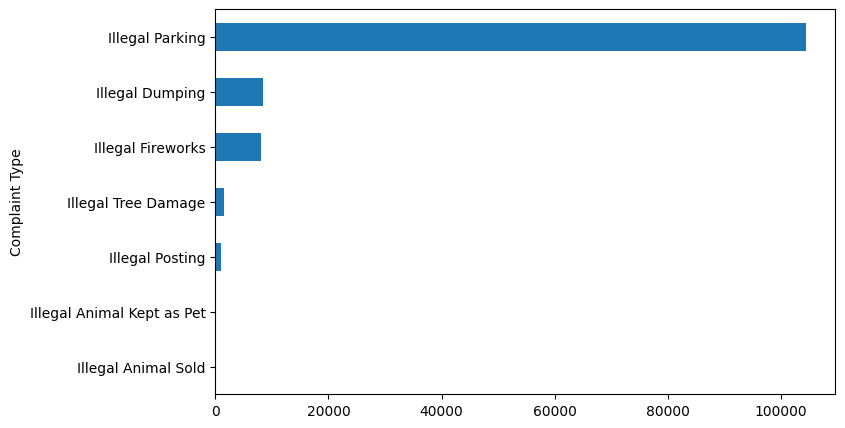

In [12]:
df['Complaint Type'].value_counts().sort_values(ascending=True).plot(kind="barh", figsize= (8,5))

In [13]:
value_counts = df['Complaint Type'].value_counts().reset_index()
value_counts.columns = ['Category', 'Count']

In [14]:
import altair as alt
# Create Altair chart
chart = alt.Chart(value_counts).mark_bar(color="darkblue").encode(
    x='Count',
    y='Category'
).properties(
    title=' Top 311 Complaints by Category',
    width=800,
    height=300
)

#remove gridlines
chart = chart.configure_axis(
    grid=False  
)



chart.show()
#chart.save("category_value_counts.svg")

alt.Chart(...)

In [ ]:
##Create highlighted bar chart

In [15]:
# Create Altair chart

#max_count = value_counts['Count'].max()
fw_count= len(df[df['Complaint Type']=="Illegal Fireworks"])
chart = alt.Chart(value_counts).mark_bar(color="pink").encode(
    x='Count',
    y='Category',
    color=alt.condition(
        #alt.datum.Count == max_count,
        alt.datum.Count == fw_count,
        alt.value('steelblue'),  # Color for bars with maximum count
        alt.value('gray')  # Color for other bars
    )


    
).properties(
    title=' Top 311 Complaints by Category',
    width=800,
    height=200
     
)


#remove gridlines
chart = chart.configure_axis(
    grid=False,
    ticks=False
)


chart.show()
#chart.save("category_value_counts.svg")

alt.Chart(...)

In [ ]:
df.info()

In [ ]:
##Convert date to datetime

In [16]:
#convert to datetime
df['created_datetime']=pd.to_datetime(df['Created Date'], format='%m/%d/%Y %I:%M:%S %p')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123392 entries, 0 to 123391
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      123392 non-null  int64         
 1   Created Date                    123392 non-null  object        
 2   Closed Date                     122523 non-null  object        
 3   Agency                          123392 non-null  object        
 4   Agency Name                     123392 non-null  object        
 5   Complaint Type                  123392 non-null  object        
 6   Descriptor                      115386 non-null  object        
 7   Location Type                   123392 non-null  object        
 8   Incident Zip                    123383 non-null  float64       
 9   Incident Address                123386 non-null  object        
 10  Street Name                     123386 non-null  object 

In [18]:
#weekday name
df['dayOfWeek'] = df['created_datetime'].dt.day_name()

In [19]:
df['date_only'] = df['created_datetime'].dt.date


## round time to the nearest hour 

In [20]:
#https://stackoverflow.com/questions/49561989/pandas-rounding-to-nearest-hour
df['hour_rounded'] = df['created_datetime'].dt.round('h').dt.hour

In [21]:

##make a new column identifying time of day#Morning (6am-11am),  6-11  
#afternoon (12-5pm)   12-17
#evening (6-11pm)    18 - 23
#late evening ( 12-5am) 24,0 1,2, 3, 4, 5,

# Conditionally update column 'B' using df.loc
df.loc[(df['hour_rounded'] >= 6) & (df['hour_rounded'] <= 11), 'time_of_day'] = 'morning'
df.loc[(df['hour_rounded'] >= 12) & (df['hour_rounded'] <= 17), 'time_of_day'] = 'afternoon'
df.loc[(df['hour_rounded'] >= 18) & (df['hour_rounded'] <= 23), 'time_of_day'] = 'evening'
df.loc[(df['hour_rounded'] < 6) | (df['hour_rounded'] >= 24), 'time_of_day'] = 'late night'

## subset to the illegal fireworks only

In [22]:
illegal_fw=df[df['Complaint Type']=="Illegal Fireworks"]

## Whats the most frequent day illegal fireworks are reported

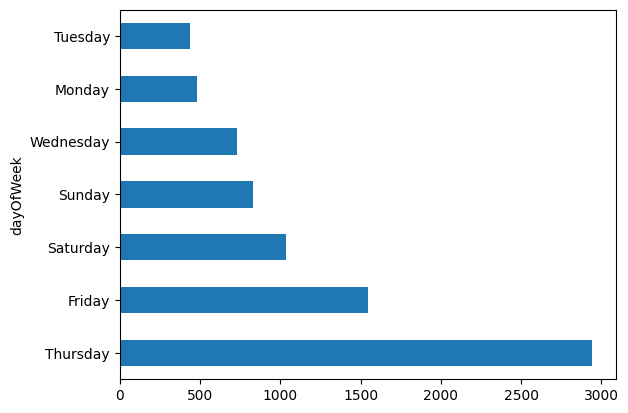

In [24]:
import matplotlib.pyplot as plt
illegal_fw['dayOfWeek'].value_counts().plot(kind="barh")
plt.savefig('day.svg', format='svg')

In [25]:
day_of_week=illegal_fw['dayOfWeek'].value_counts().reset_index()
day_of_week.columns=['day','count']


In [26]:
chart = alt.Chart(day_of_week).mark_bar().encode(
    y='day',
    x='count'
)



chart.show()  # This will display the chart

alt.Chart(...)

In [27]:

chart = alt.Chart(day_of_week).mark_bar().encode(
    x=alt.X('count', title=''),
    y=alt.Y('day', title='')


).properties(
    title=' Most Popular day',
    width=800,
    height=200
     
)


#remove gridlines
chart = chart.configure_axis(
    grid=False,
    ticks=False
)


chart.show()  # This will display the chart

alt.Chart(...)

## what are the most popular hours of the day for reporting issues


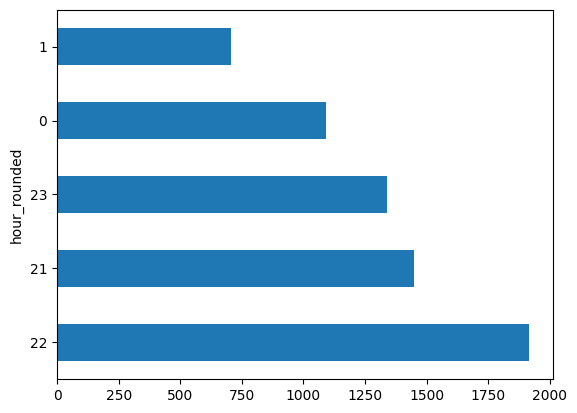

In [28]:
##what are the most popular hours of the day for reporting issues
fw_hours=illegal_fw['hour_rounded'].value_counts().head()
fw_hours.columns =['hour','count']
#value_counts = df['Complaint Type'].value_counts().reset_index()
#value_counts.columns = ['Category', 'Count']
fw_hours.plot(kind="barh")

# Save the plot as SVG
plt.savefig('hours.svg', format='svg')

## whats the most popular time of day for reporting fireworks?

In [29]:
illegal_fw['time_of_day'].value_counts()

time_of_day
evening       5199
late night    2495
afternoon      186
morning        126
Name: count, dtype: int64

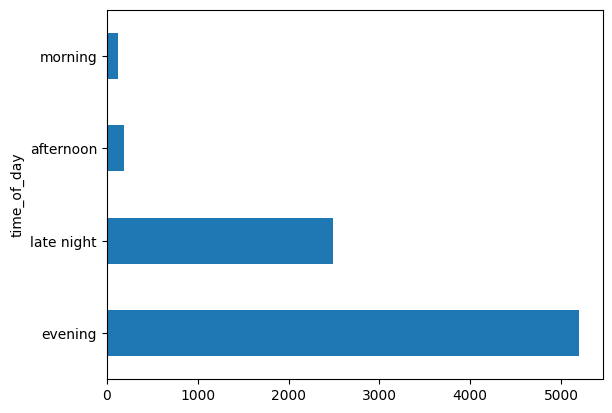

In [30]:
illegal_fw['time_of_day'].value_counts().plot(kind="barh")

plt.savefig('time.svg', format='svg')

In [ ]:
## how many fireworks reported over time

In [ ]:
illegal_fw.info()

In [33]:
dates_fw=illegal_fw['date_only'].value_counts().reset_index()
dates_fw.columns =['date','count']

dates_fw.to_csv('outputdates.csv', index=False)

<Axes: >

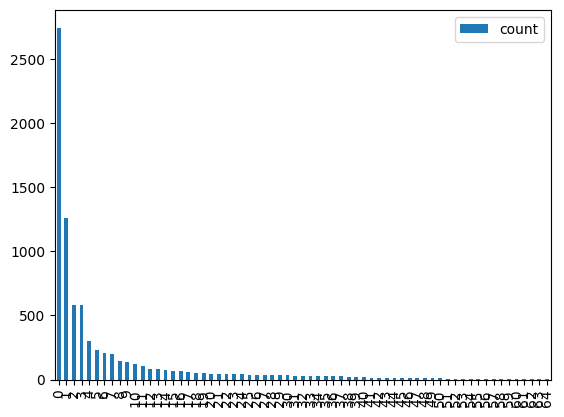

In [32]:
dates_fw.plot(kind="bar")